In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os



In [4]:
chemin_du_repertoire = 'C:\\Users\\yvann\\OneDrive\\Documents\\Jedha\\CERTIFICATION BLOC 6'

# Changez le répertoire de travail
os.chdir(chemin_du_repertoire)

df4 = pd.read_csv("Player_Career_Info.csv")
print(df4)

      player_id                player  birth_year    hof  num_seasons  \
0             1          Al Brightman         NaN  False            1   
1             2             Al Lujack         NaN  False            1   
2             3           Al Negratti         NaN  False            1   
3             4           Angelo Musi         NaN  False            3   
4             5         Ariel Maughan      1923.0  False            5   
...         ...                   ...         ...    ...          ...   
5204       5205  Trayce Jackson-Davis         NaN  False            1   
5205       5206          Trey Jemison         NaN  False            1   
5206       5207      Tristan Vukcevic         NaN  False            1   
5207       5208        Vasilije Micić         NaN  False            1   
5208       5209     Victor Wembanyama         NaN  False            1   

      first_seas  last_seas  
0           1947       1947  
1           1947       1947  
2           1947       1947  
3  

In [5]:
df4.head()

,player_id,player,birth_year,hof,num_seasons,first_seas,last_seas
0,1,Al Brightman,NaN,False,1,1947,1947
1,2,Al Lujack,NaN,False,1,1947,1947
2,3,Al Negratti,NaN,False,1,1947,1947
3,4,Angelo Musi,NaN,False,3,1947,1949
4,5,Ariel Maughan,1923.0,False,5,1947,1951


In [6]:
df4.drop(['birth_year', 'hof'], axis=1, inplace=True)
df4.head()

,player_id,player,num_seasons,first_seas,last_seas
0,1,Al Brightman,1,1947,1947
1,2,Al Lujack,1,1947,1947
2,3,Al Negratti,1,1947,1947
3,4,Angelo Musi,3,1947,1949
4,5,Ariel Maughan,5,1947,1951


In [7]:
df4.to_csv('Player Career Info.csv', index=False)

In [8]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5209 entries, 0 to 5208
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    5209 non-null   int64 
 1   player       5209 non-null   object
 2   num_seasons  5209 non-null   int64 
 3   first_seas   5209 non-null   int64 
 4   last_seas    5209 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 203.6+ KB


In [9]:
df4.isnull().sum()

player_id      0
player         0
num_seasons    0
first_seas     0
last_seas      0
dtype: int64

In [10]:
mean_num_seasons = df4['num_seasons'].mean().round(2)
print("Moyenne de saisons effectuées en NBA par les joueurs depuis la création de la compétition :", mean_num_seasons, "années")


Moyenne de saisons effectuées en NBA par les joueurs depuis la création de la compétition : 4.96 années


In [11]:
# Convertir les colonnes 'first_seas' et 'last_seas' en type datetime
df4['first_seas'] = pd.to_datetime(df4['first_seas'], format='%Y')
df4['last_seas'] = pd.to_datetime(df4['last_seas'], format='%Y')


In [12]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5209 entries, 0 to 5208
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   player_id    5209 non-null   int64         
 1   player       5209 non-null   object        
 2   num_seasons  5209 non-null   int64         
 3   first_seas   5209 non-null   datetime64[ns]
 4   last_seas    5209 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 203.6+ KB


In [13]:
start_year = 1978
filtered_data = df4[df4['first_seas'].dt.year >= start_year]
# Calculer la moyenne du nombre total de saisons jouées par joueur
mean_seasons = filtered_data['num_seasons'].mean().round(2)
print(f"Moyenne du nombre total de saisons jouées par joueur depuis {start_year} : {mean_seasons} années")


Moyenne du nombre total de saisons jouées par joueur depuis 1978 : 5.43 années


In [14]:
# Créer une nouvelle colonne 'Decade' contenant l'année de la décennie pour chaque joueur
df4['Decade1'] = (df4['first_seas'].dt.year // 10) * 10

# Calculer la moyenne des saisons effectuées par joueur par tranche de décennie
mean_seasons_by_decade = df4.groupby('Decade1')['num_seasons'].mean().round(1)

# Créer un DataFrame à partir des moyennes par décennie
mean_seasons_df = pd.DataFrame({'Décennie': mean_seasons_by_decade.index,
                                'Moyenne de saisons jouées': mean_seasons_by_decade.values})

print(mean_seasons_df)


   Décennie  Moyenne de saisons jouées
0      1940                        2.5
1      1950                        3.2
2      1960                        4.8
3      1970                        4.9
4      1980                        6.1
5      1990                        6.4
6      2000                        6.7
7      2010                        5.0
8      2020                        2.3


In [15]:
# Filtrer les décennies
filtered_df = df4[df4['Decade1'].between(1940, 1990)]

# Calculer la moyenne des saisons effectuées par joueur dans chaque décennie
mean_seasons_by_decade = filtered_df.groupby('Decade1')['num_seasons'].mean().round(1)

# Créer un DataFrame à partir des moyennes par décennie
mean_seasons_df = pd.DataFrame({'Décennie': mean_seasons_by_decade.index,
                                'Moyenne par saison': mean_seasons_by_decade.values})

print(mean_seasons_df)


   Décennie  Moyenne par saison
0      1940                 2.5
1      1950                 3.2
2      1960                 4.8
3      1970                 4.9
4      1980                 6.1
5      1990                 6.4


In [25]:
# Sélectionner les joueurs ayant joués le plus de saisons en NBA

top_players = df4.nlargest(11, 'num_seasons')
blankIndex=[''] * len(df4)
df4.index=blankIndex
print(top_players[['player', 'num_seasons']])



               player  num_seasons
         Vince Carter           22
         Moses Malone           21
        Robert Parish           21
         Kevin Willis           21
        Kevin Garnett           21
        Dirk Nowitzki           21
         LeBron James           21
  Kareem Abdul-Jabbar           20
          Kobe Bryant           20
       Jamal Crawford           20
        Udonis Haslem           20


DETAIL DU NOMBRE DE SAISON JOUÉ PAR LES JOUEURS DEPUIS 1947

In [17]:
def calculate_proportions(start_year):
    # Filtrer les données pour ne conserver que celles à partir de l'année spécifiée
    filtered_data = df4[df4['first_seas'].dt.year >= start_year]

    # Compter le nombre de joueurs par nombre de saisons jouées
    season_counts = filtered_data['num_seasons'].value_counts().sort_index()

    # Calculer le nombre total de joueurs
    total_players = season_counts.sum()

    # Calculer la proportion de chaque nombre de saisons jouées en pourcentage
    proportions = {}
    for num_seasons, count in season_counts.items():
        prop = (count / total_players) * 100
        proportions[num_seasons] = (count, prop)

    return proportions

# Calculer les proportions depuis ...
proportions_since_1947 = calculate_proportions(1947)

print(f"Nombre de saisons jouées depuis 1947 | Nombre de joueurs | Proportion (%)")
print("---------------------------------------------------------------------------")
for num_seasons, (count, prop) in proportions_since_1947.items():
    print(f"{num_seasons:<36} | {count:<18} | {prop:.2f}")


Nombre de saisons jouées depuis 1947 | Nombre de joueurs | Proportion (%)
---------------------------------------------------------------------------
1                                    | 1449               | 27.82
2                                    | 786                | 15.09
3                                    | 533                | 10.23
4                                    | 365                | 7.01
5                                    | 274                | 5.26
6                                    | 253                | 4.86
7                                    | 201                | 3.86
8                                    | 207                | 3.97
9                                    | 171                | 3.28
10                                   | 217                | 4.17
11                                   | 174                | 3.34
12                                   | 144                | 2.76
13                                   | 147                | 2.82
14

DETAIL DU NOMBRE DE SAISON JOUÉ PAR LES JOUEURS DEPUIS UNE DATE SPÉCIFIQUE (AU PLUS LOIN, 1947)

In [18]:
# Spécifier les années de début pour le filtrage
start_years = [1998]

for start_year in start_years:
    # Filtrer les données pour ne conserver que celles à partir de l'année spécifiée
    filtered_data = df4[df4['first_seas'].dt.year >= start_year]

    # Compter le nombre de joueurs par nombre de saisons jouées
    season_counts = filtered_data['num_seasons'].value_counts().sort_index()

    # Calculer la proportion de chaque nombre de saisons jouées en pourcentage
    total_players = season_counts.sum()
    proportion = (season_counts / total_players) * 100

    print(f"Nombre de saisons jouées depuis {start_year} |  Nombre de joueurs | Proportion (%)")
    print("-------------------------------------------------------------------------")
    for num_seasons, count in season_counts.items():
        prop = (count / total_players) * 100
        print(f"{num_seasons:<36} | {count:<18} | {prop:.2f}")
    print("\n")


Nombre de saisons jouées depuis 1998 |  Nombre de joueurs | Proportion (%)
-------------------------------------------------------------------------
1                                    | 504                | 23.17
2                                    | 359                | 16.51
3                                    | 259                | 11.91
4                                    | 188                | 8.64
5                                    | 120                | 5.52
6                                    | 115                | 5.29
7                                    | 93                 | 4.28
8                                    | 91                 | 4.18
9                                    | 70                 | 3.22
10                                   | 84                 | 3.86
11                                   | 63                 | 2.90
12                                   | 57                 | 2.62
13                                   | 57                 | 2.62
14 

DETAIL DU NOMBRE DE SAISON JOUÉ PAR LES JOUEURS PAR DÉCENNIE DEPUIS 1947

In [19]:
# Créer une fonction pour calculer les statistiques par décennie
def calculate_stats_by_decade(df4):
    stats_by_decade = {}
    decades = range(1940, 2030, 10)  # Liste des décennies de 1940 à ....

    for start_year in decades:
        end_year = start_year + 9
        decade_label = f"{start_year}-{end_year}"

        # Filtrer les données pour la décennie spécifiée
        filtered_data = df4[(df4['first_seas'].dt.year >= start_year) & (df4['first_seas'].dt.year <= end_year)]

        # Calculer les statistiques pour la décennie
        num_players = len(filtered_data)
        proportion = filtered_data['num_seasons'].value_counts(normalize=True) * 100
        proportion_sorted = proportion.sort_index()

        # Calculer le nombre total de joueurs pour chaque nombre de saisons jouées
        total_players_by_seasons = filtered_data['num_seasons'].value_counts().sort_index()

        # Calculer le nombre total de joueurs pour la décennie
        total_players_decade = total_players_by_seasons.sum()

        # Calculer la durée de carrière moyenne
        avg_career_duration = filtered_data['num_seasons'].mean().round(1)

        # Enregistrer les statistiques dans le dictionnaire
        stats_by_decade[decade_label] = {
            'Nombre total de joueurs': num_players,
            'Proportions (%)': proportion_sorted,
            'Nombre total de joueurs par saison': total_players_by_seasons,
            'Nombre total de joueurs pour la décennie': total_players_decade,
            'Durée de carrière moyenne': avg_career_duration
        }

    return stats_by_decade

stats_by_decade = calculate_stats_by_decade(df4)

# Afficher les statistiques pour chaque décennie
for decade, stats in stats_by_decade.items():
    print(f"Nombre de saisons jouées durant les années {decade} |  Nombre de joueurs | Proportion (%)")
    print("-------------------------------------------------------------------------")
    for num_seasons, count in stats['Nombre total de joueurs par saison'].items():
        proportion = stats['Proportions (%)'].get(num_seasons, 0)  # Obtenir la proportion correspondante
        print(f"{num_seasons:<54} | {count:<18} | {proportion:<10.2f}")
    print("Nombre total de joueurs pour la décennie :", stats['Nombre total de joueurs pour la décennie'])
    print("Durée de carrière moyenne :", stats['Durée de carrière moyenne'])
    print("\n")


Nombre de saisons jouées durant les années 1940-1949 |  Nombre de joueurs | Proportion (%)
-------------------------------------------------------------------------
1                                                      | 143                | 48.47     
2                                                      | 59                 | 20.00     
3                                                      | 34                 | 11.53     
4                                                      | 17                 | 5.76      
5                                                      | 15                 | 5.08      
6                                                      | 7                  | 2.37      
7                                                      | 5                  | 1.69      
8                                                      | 3                  | 1.02      
9                                                      | 4                  | 1.36      
10                                

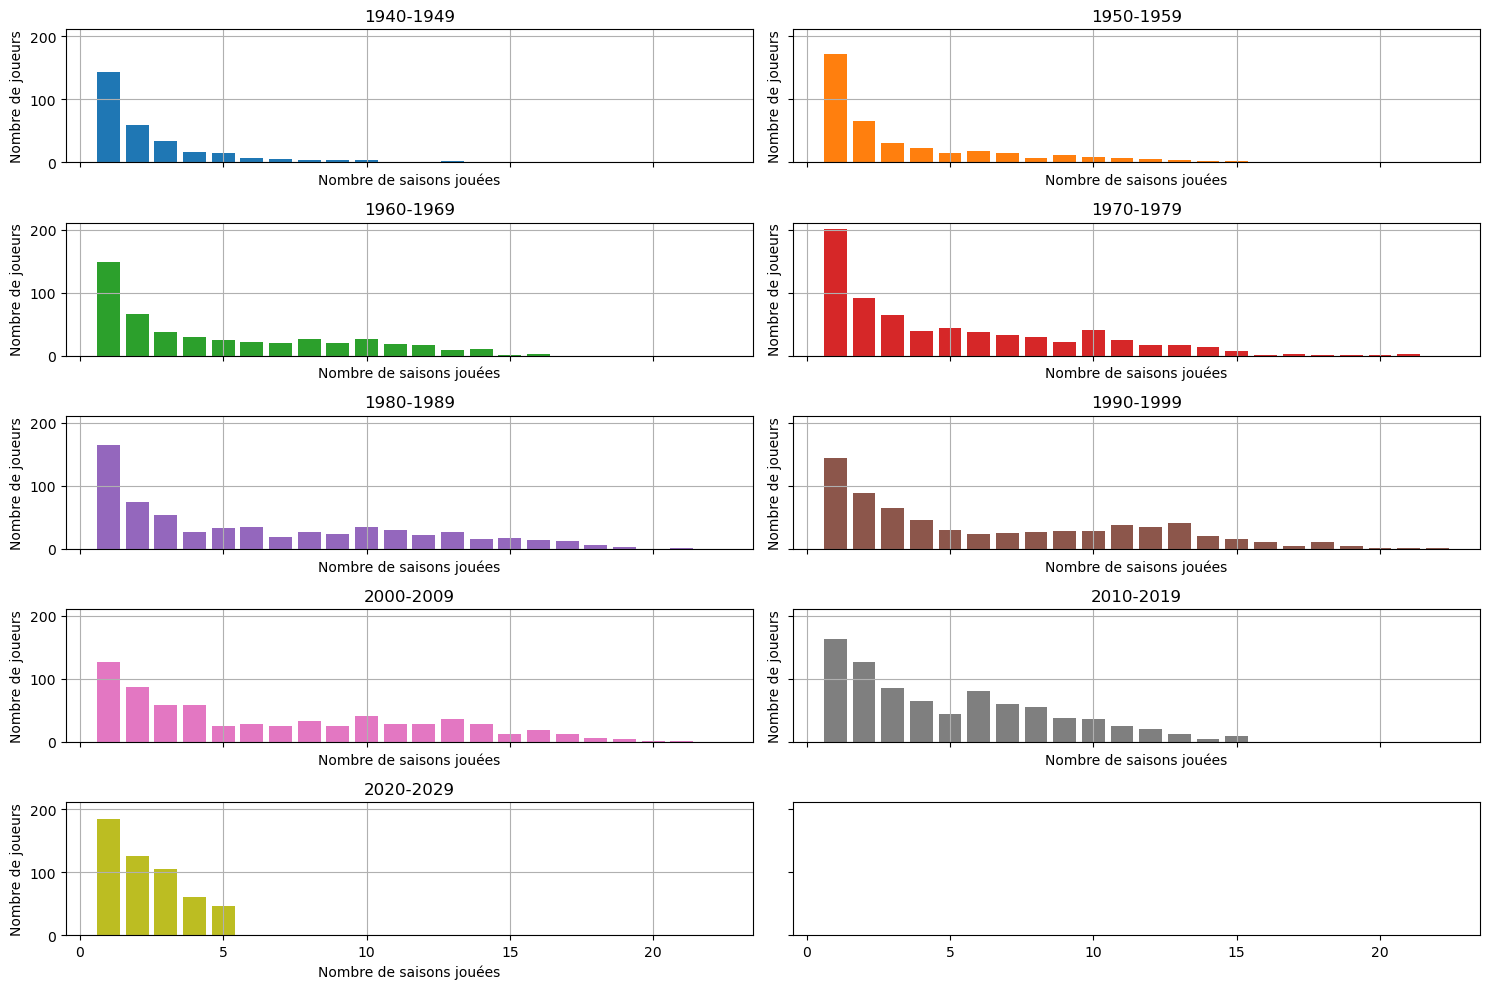

In [20]:
import matplotlib.pyplot as plt

# Créer une fonction pour calculer le nombre de saisons par décennie
def calculate_season_counts_by_decade(df4):
    decades = range(1940, 2030, 10)
    season_counts_by_decade = {}

    for start_year in decades:
        end_year = start_year + 9
        decade_label = f"{start_year}-{end_year}"
        filtered_data = df4[(df4['first_seas'].dt.year >= start_year) & (df4['first_seas'].dt.year <= end_year)]
        season_counts = filtered_data['num_seasons'].value_counts().sort_index()
        season_counts_by_decade[decade_label] = season_counts

    return season_counts_by_decade

# Calculer le nombre de saisons par décennie
season_counts_by_decade = calculate_season_counts_by_decade(df4)

# Graphique
num_decades = len(season_counts_by_decade)
num_rows = num_decades // 2 + num_decades % 2
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 10), sharex=True, sharey=True)

for i, (decade, season_counts) in enumerate(season_counts_by_decade.items()):
    ax = axes[i // 2, i % 2]
    ax.bar(season_counts.index, season_counts.values, color=plt.cm.tab10(i))
    ax.set_title(decade)
    ax.set_xlabel('Nombre de saisons jouées')
    ax.set_ylabel('Nombre de joueurs')
    ax.grid(True)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

plt.show()



<Figure size 1200x800 with 0 Axes>

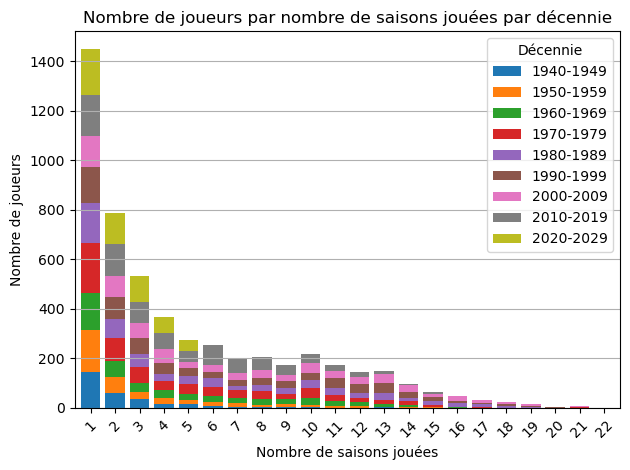

In [21]:
import matplotlib.pyplot as plt

# Créer une fonction pour calculer le nombre de saisons par décennie
def calculate_season_counts_by_decade(df4):
    decades = range(1940, 2030, 10)
    season_counts_by_decade = {}

    for start_year in decades:
        end_year = start_year + 9
        decade_label = f"{start_year}-{end_year}"
        filtered_data = df4[(df4['first_seas'].dt.year >= start_year) & (df4['first_seas'].dt.year <= end_year)]
        season_counts = filtered_data['num_seasons'].value_counts().sort_index()
        season_counts_by_decade[decade_label] = season_counts

    return season_counts_by_decade

# Calculer le nombre de saisons par décennie
season_counts_by_decade = calculate_season_counts_by_decade(df4)

# Convertir les données en DataFrame pandas 
import pandas as pd
df_season_counts_by_decade = pd.DataFrame(season_counts_by_decade)

# Graphique
plt.figure(figsize=(12, 8))
df_season_counts_by_decade.plot(kind='bar', stacked=True, width=0.8)

plt.xlabel('Nombre de saisons jouées')
plt.ylabel('Nombre de joueurs')
plt.title('Nombre de joueurs par nombre de saisons jouées par décennie')
plt.xticks(rotation=45)
plt.legend(title='Décennie')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


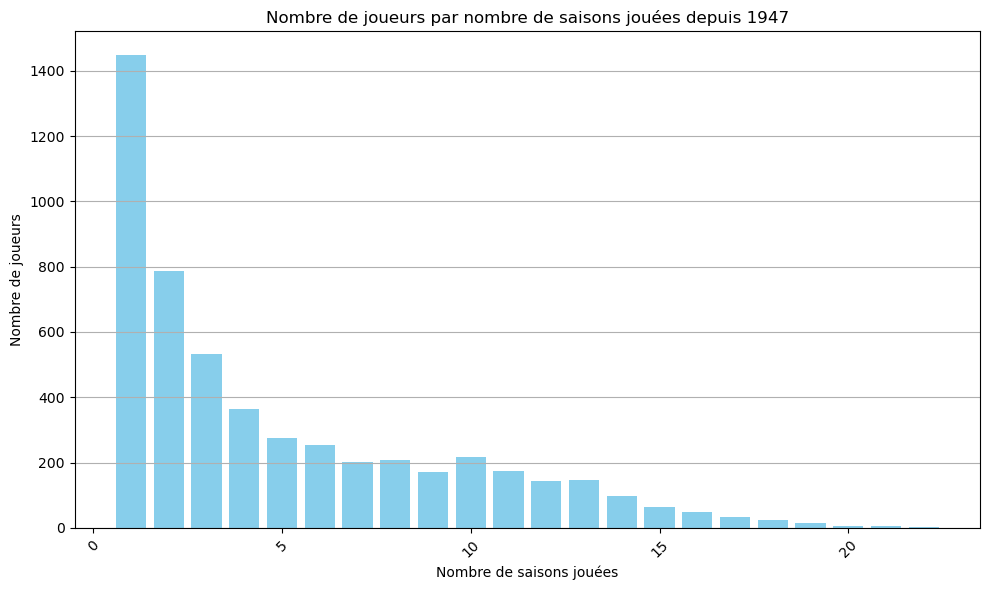

In [22]:
import matplotlib.pyplot as plt

# Compter le nombre de saisons jouées par joueur depuis 1947
season_counts = df4['num_seasons'].value_counts().sort_index()

# Convertir la série en un DataFrame avec des colonnes appropriées
season_counts_df = season_counts.reset_index()
season_counts_df.columns = ['Nombre de saisons jouées', 'Nombre de joueurs']

# Graphique
plt.figure(figsize=(10, 6))
plt.bar(season_counts_df['Nombre de saisons jouées'], season_counts_df['Nombre de joueurs'], color='skyblue')
plt.xlabel('Nombre de saisons jouées')
plt.ylabel('Nombre de joueurs')
plt.title('Nombre de joueurs par nombre de saisons jouées depuis 1947')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


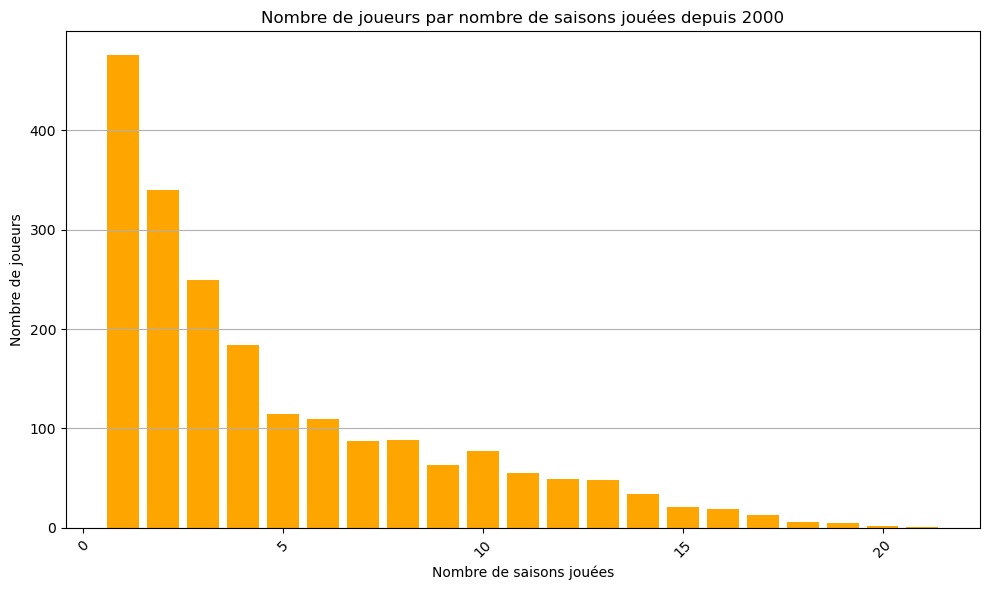

In [23]:
start_year = 2000

# Filtrer les données pour ne conserver que celles à partir de l'année spécifiée
filtered_data = df4[df4['first_seas'].dt.year >= start_year]

# Compter le nombre de joueurs par nombre de saisons jouées
season_counts = filtered_data['num_seasons'].value_counts().sort_index()

# Convertir la série 
season_counts_df = season_counts.reset_index()
season_counts_df.columns = ['Nombre de saisons jouées', 'Nombre de joueurs']

# Graphique
plt.figure(figsize=(10, 6))
plt.bar(season_counts_df['Nombre de saisons jouées'], season_counts_df['Nombre de joueurs'], color='orange')

plt.xlabel('Nombre de saisons jouées')
plt.ylabel('Nombre de joueurs')
plt.title(f'Nombre de joueurs par nombre de saisons jouées depuis {start_year}')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()
